In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [30]:
X_train = pd.read_csv('C:/Users/dstarasov/Desktop/stepik/task/DS/train_iris.csv', index_col = 0)

In [33]:
X_test = pd.read_csv('C:/Users/dstarasov/Desktop/stepik/task/DS/test_iris.csv',  index_col = 0)

In [35]:
y_test = X_test.species
y_train = X_train.species

In [36]:
X_train = X_train.rename(columns = {'sepal length' : 'sepal_length',
                                      'sepal width' : 'sepal_width', 'petal length' : 'petal_length', 'petal width' : 'petal_width' }).drop(['species'], axis = 1)

In [38]:
X_test = X_test.rename(columns = {'sepal length' : 'sepal_length',
                     'sepal width' : 'sepal_width', 'petal length' : 'petal_length', 'petal width' : 'petal_width' }).drop(['species'], axis = 1)

In [42]:
max_depth_values = range(1,100)

In [45]:
rs = np.random.seed(0)

In [48]:
scores_data = pd.DataFrame()

In [49]:
for max_depth in max_depth_values : # создаём цикл 
        np.random.seed(0)
        clf = clf = tree.DecisionTreeClassifier(random_state = rs, criterion = 'entropy', max_depth = max_depth) # 
        clf.fit(X_train, y_train)
        test_score = clf.score(X_test,y_test)
        train_score = clf.score(X_train, y_train)
        
        temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                        'train_score' : [train_score],
                                        'test_score' : [test_score]})
        scores_data = scores_data.append(temp_score_data)

In [52]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', "test_score"], 
                            var_name='set_type', value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

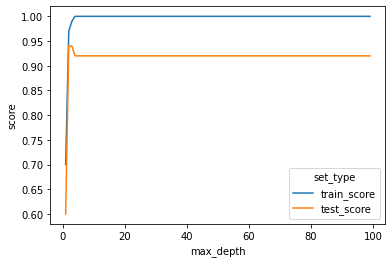

In [59]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")